In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [4]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [5]:
studio_distribution = studios.group('Studio')

In [6]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


## Bar Charts ##

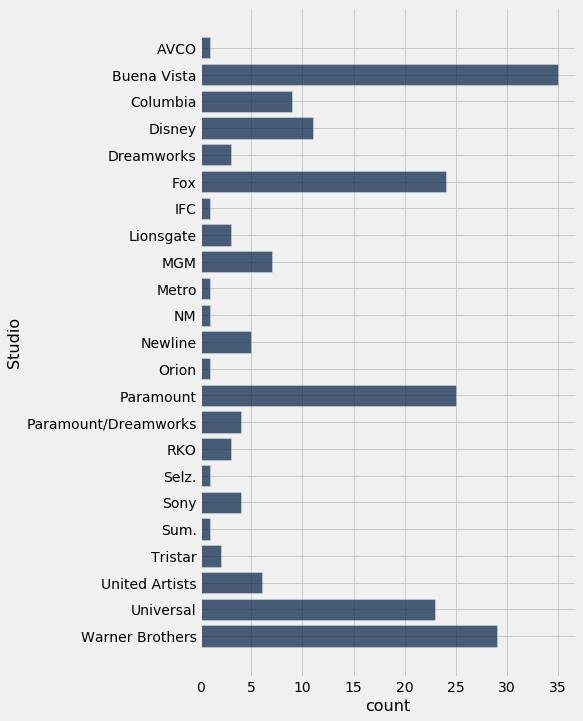

In [8]:
studio_distribution.barh('Studio')

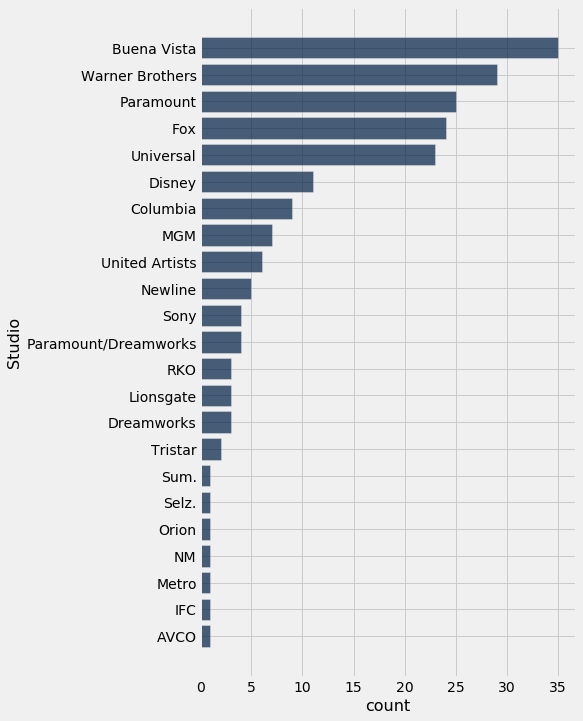

In [9]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [9]:
ages = 2022 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [10]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Gone with the Wind,MGM,198676459,1796176700,1939,198.676,83
Star Wars,Fox,460998007,1583483200,1977,460.998,45
The Sound of Music,Fox,158671368,1266072700,1965,158.671,57
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,435.111,40
Titanic,Paramount,658672302,1204368000,1997,658.672,25
The Ten Commandments,Paramount,65500000,1164590000,1956,65.5,66
Jaws,Universal,260000000,1138620700,1975,260,47
Doctor Zhivago,MGM,111721910,1103564200,1965,111.722,57
The Exorcist,Warner Brothers,232906145,983226600,1973,232.906,49
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,184.925,85


In [12]:
min(ages), max(ages)

(2, 98)

In [11]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [12]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,20
100,0


In [15]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,81
25,70
50,39
75,9
100,0


## Histograms ##

In [19]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [20]:
binned_data

bin,Age count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


In [20]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [21]:
binned_data

bin,Age count,Percent
0,0,0
5,25,12.5
10,16,8
15,40,20
25,42,21
40,56,28
65,20,10
100,0,0


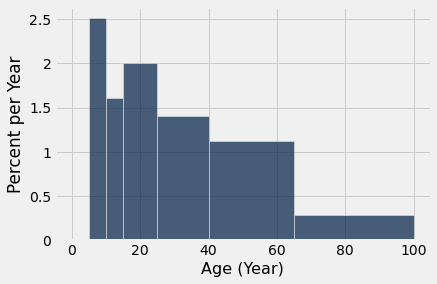

In [17]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

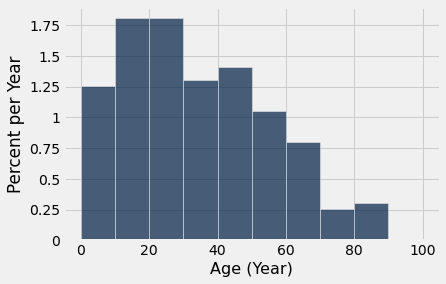

In [18]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

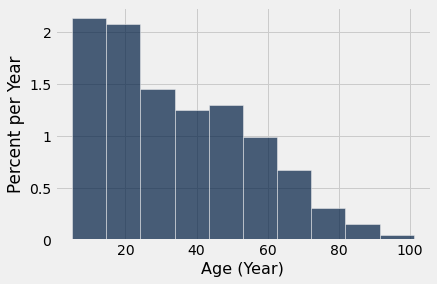

In [19]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

## Height ##

### Question: What is the height of the [40, 65] bin?

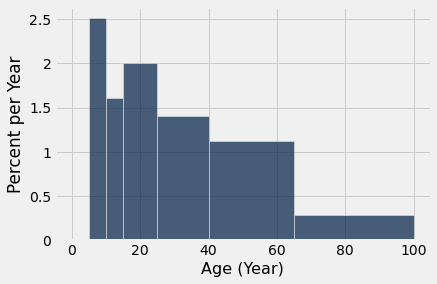

In [22]:
top_movies.hist('Age', bins=my_bins, unit='Year')

In [27]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [24]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [25]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.12

### What are the heights of the rest of the bins?

In [29]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [30]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [32]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [33]:
bin_lefts

bin,Age count,Percent,Width,Height
0,18,9,5,1.8
5,15,7.5,5,1.5
10,17,8.5,5,1.7
15,41,20.5,10,2.05
25,41,20.5,15,1.36667
40,51,25.5,25,1.02
65,17,8.5,35,0.242857


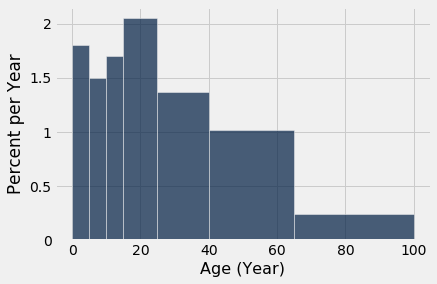

In [34]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')